In [ ]:
!pip install emnist

In [ ]:
CLASSES = ['FI','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from emnist import extract_training_samples,extract_test_samples
def load_dataset():
  XTrain,yTrain = extract_training_samples('letters')
  XTest,yTest = extract_test_samples('letters')
  # Normalize the dataset
  XTrain = np.expand_dims(XTrain,-1)
  XTest = np.expand_dims(XTest,-1)
  # One Hot Encode the labels
  yTrain = to_categorical(yTrain)
  yTest = to_categorical(yTest)
  return (XTrain,XTest,yTrain,yTest)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def preprocessData(X_train,X_test):
  XTrain = X_train.reshape(X_train.shape[0],784)
  XTest = X_test.reshape(X_test.shape[0],784)
  minmax = MinMaxScaler()
  XTrain = minmax.fit_transform(XTrain)
  XTest = minmax.fit_transform(XTest)
  return (XTrain,XTest)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,BatchNormalization,Flatten,Dense
def cnn():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(27, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
def svm():
  model = Sequential()
  model.add(Dense(256,input_dim=784, activation='relu'))
  model.add(Dense(27, kernel_regularizer=l2(0.01), activation='softmax'))
  model.compile(loss='squared_hinge',optimizer='adadelta',metrics=['accuracy'])
  return model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def ann():
  model = Sequential()
  model.add(Dense(units=256,input_dim=784 , kernel_initializer='uniform', activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(27, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
import matplotlib.pyplot as plt
# plot diagnostic learning curves
def show_learning_graphs(history):
  plt.figure(figsize=(15, 15))
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
from sklearn.metrics import confusion_matrix as con_mat
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix(testY,predicted_classes):
  cm = con_mat(np.argmax(testY,axis=1), np.argmax(predicted_classes,axis=1))
  plt.figure(figsize=(15, 15))
  sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report as report

def classification_report(testY,predicted_classes):
  global CLASSES
  num_classes = 10
  target_names = ["Class {}".format(i) for i in CLASSES]

  print(report(testY, predicted_classes, target_names = target_names))

## Convolution Neural Network (CNN)

In [ ]:
cnn_model = cnn()
cnn_model.summary()

X_train,X_test,y_train,y_test = load_dataset()
history = cnn_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)       1

Epoch 1/25
3900/3900 [==============================] - 75s 17ms/step - loss: 0.5430 - accuracy: 0.8335 - val_loss: 0.2233 - val_accuracy: 0.9251
Epoch 2/25
3900/3900 [==============================] - 58s 15ms/step - loss: 0.2812 - accuracy: 0.9081 - val_loss: 0.1849 - val_accuracy: 0.9384
Epoch 3/25
3900/3900 [==============================] - 56s 14ms/step - loss: 0.2418 - accuracy: 0.9204 - val_loss: 0.1818 - val_accuracy: 0.9400
Epoch 4/25
3900/3900 [==============================] - 54s 14ms/step - loss: 0.2168 - accuracy: 0.9271 - val_loss: 0.1661 - val_accuracy: 0.9436
Epoch 5/25
3900/3900 [==============================] - 56s 14ms/step - loss: 0.2021 - accuracy: 0.9323 - val_loss: 0.1659 - val_accuracy: 0.9441
Epoch 6/25
3900/3900 [==============================] - 59s 15ms/step - loss: 0.1889 - accuracy: 0.9358 - val_loss: 0.1548 - val_accuracy: 0.9471
Epoch 7/25
3900/3900 [==============================] - 59s 15ms/step - loss: 0.1827 - accuracy: 0.9377 - val_loss: 0.1549 -

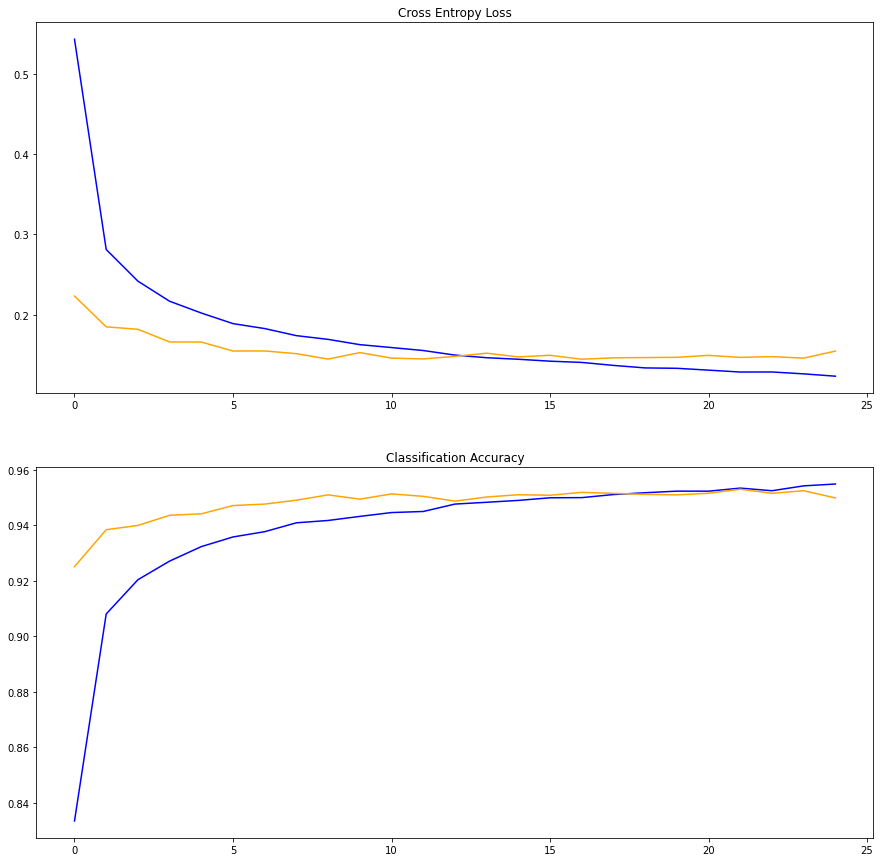

In [ ]:
show_learning_graphs(history)

In [ ]:
cnn_model.save('/content/drive/MyDrive/notebooks/text_recognition_xmnist/cnn_classifier.h5')

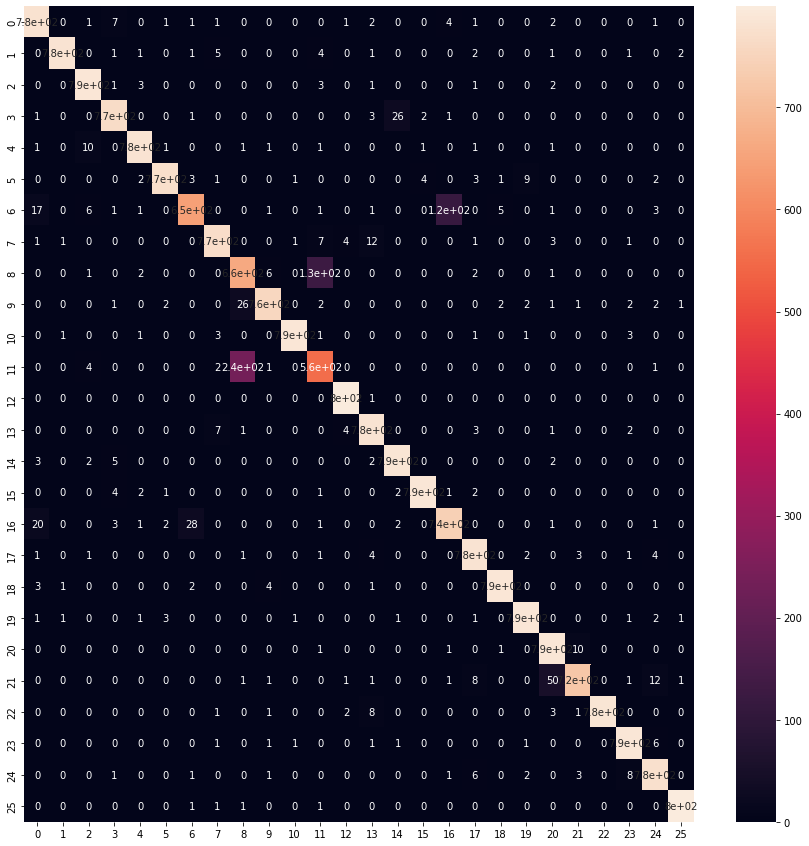

In [ ]:
# Confusion Matrix
import numpy as np
from tensorflow.keras.utils import to_categorical

predicted_classes = to_categorical(np.argmax(cnn_model.predict(X_test),axis=1))
confusion_matrix(y_test,predicted_classes)

In [ ]:
classification_report(y_test,predicted_classes)

              precision    recall  f1-score   support

    Class FI       0.00      0.00      0.00         0
     Class A       0.94      0.97      0.96       800
     Class B       0.99      0.98      0.99       800
     Class C       0.97      0.99      0.98       800
     Class D       0.97      0.96      0.96       800
     Class E       0.98      0.98      0.98       800
     Class F       0.99      0.97      0.98       800
     Class G       0.94      0.81      0.87       800
     Class H       0.97      0.96      0.97       800
     Class I       0.71      0.83      0.77       800
     Class J       0.98      0.95      0.96       800
     Class K       0.99      0.99      0.99       800
     Class L       0.79      0.69      0.74       800
     Class M       0.99      1.00      0.99       800
     Class N       0.95      0.98      0.97       800
     Class O       0.96      0.98      0.97       800
     Class P       0.99      0.98      0.99       800
     Class Q       0.85    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Artificial Neural Network (ANN)

In [ ]:
ann_model = ann()
ann_model.summary()

X_train,X_test,y_train,y_test = load_dataset()
X_train,X_test = preprocessData(X_train,X_test)
history = ann_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 27)                1755      
                                                                 
Total params: 219,163
Trainable params: 219,163
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
3900/3900 [==============================] - 16s 4ms/step - loss: 0.6353 - accuracy: 0.8072 - val_loss: 0.4068 - val_accuracy: 0.8729
Epoch 2/25
3900/3900 [==============================] - 14s 4ms/step - loss: 0.3518 - accuracy: 0.8874 - val_loss: 0.3803 - val_accuracy: 0.8790
Epoch 3/25
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2931 - accuracy: 0.9037 - val_loss: 0.3223 - val_accuracy: 0.8977
Epoch 4/25
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2571 - accuracy: 0.9146 - val_loss: 0.3123 - val_accuracy: 0.9018
Epoch 5/25
3900/3900 [==============================] - 16s 4ms/step - loss: 0.2324 - accuracy: 0.9208 - val_loss: 0.3239 - val_accuracy: 0.9025
Epoch 6/25
3900/3900 [==============================] - 14s 4ms/step - loss: 0.2152 - accuracy: 0.9258 - val_loss: 0.3359 - val_accuracy: 0.8984
Epoch 7/25
3900/3900 [==============================] - 14s 4ms/step - loss: 0.1993 - accuracy: 0.9305 - val_loss: 0.3382 - val_ac

In [ ]:
ann_model.save('/content/drive/MyDrive/notebooks/text_recognition_xmnist/ann_classifier.h5')

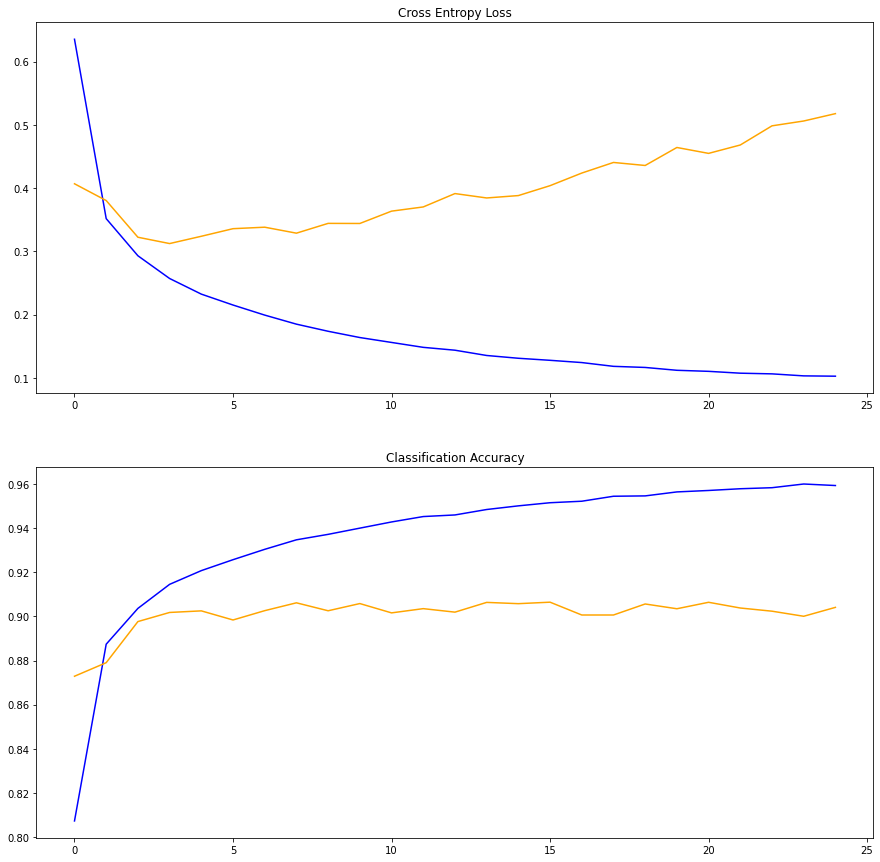

In [ ]:
show_learning_graphs(history)

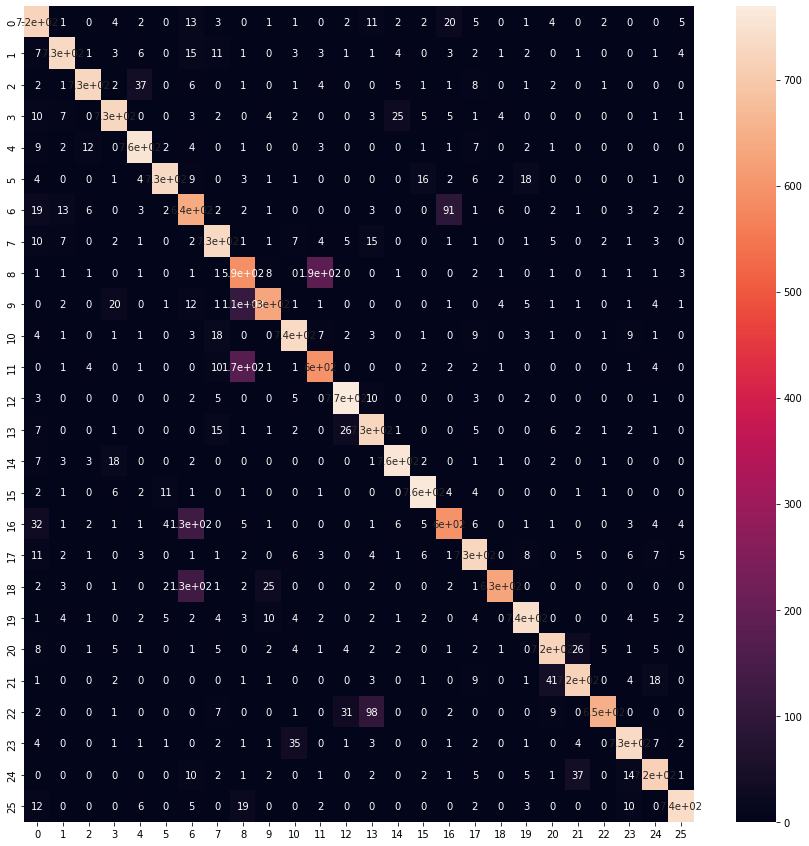

In [ ]:
# Confusion Matrix
import numpy as np
from tensorflow.keras.utils import to_categorical

predicted_classes = to_categorical(np.argmax(ann_model.predict(X_test),axis=1))
confusion_matrix(y_test,predicted_classes)

In [ ]:
classification_report(y_test,predicted_classes)

              precision    recall  f1-score   support

    Class FI       0.00      0.00      0.00         0
     Class A       0.82      0.90      0.86       800
     Class B       0.94      0.91      0.92       800
     Class C       0.96      0.91      0.93       800
     Class D       0.91      0.91      0.91       800
     Class E       0.91      0.94      0.93       800
     Class F       0.96      0.92      0.94       800
     Class G       0.65      0.80      0.72       800
     Class H       0.89      0.91      0.90       800
     Class I       0.64      0.74      0.69       800
     Class J       0.91      0.79      0.85       800
     Class K       0.91      0.92      0.91       800
     Class L       0.73      0.75      0.74       800
     Class M       0.91      0.96      0.94       800
     Class N       0.82      0.91      0.86       800
     Class O       0.94      0.95      0.94       800
     Class P       0.94      0.96      0.95       800
     Class Q       0.81    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [ ]:
svm_model = svm()
svm_model.summary()

X_train,X_test,y_train,y_test = load_dataset()
X_train,X_test = preprocessData(X_train,X_test)
history = svm_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dense_8 (Dense)             (None, 27)                6939      
                                                                 
Total params: 207,899
Trainable params: 207,899
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
3900/3900 [==============================] - 16s 4ms/step - loss: 1.5269 - accuracy: 0.0375 - val_loss: 1.4939 - val_accuracy: 0.0383
Epoch 2/25
3900/3900 [==============================] - 16s 4ms/step - loss: 1.4627 - accuracy: 0.0408 - val_loss: 1.4329 - val_accuracy: 0.0414
Epoch 3/25
3900/3900 [==============================] - 16s 4ms/step - loss: 1.4061 - accuracy: 0.0442 - val_loss: 1.3806 - val_accuracy: 0.0454
Epoch 4/2

In [ ]:
svm_model.save('/content/drive/MyDrive/notebooks/text_recognition_xmnist/svm_classifier.h5')

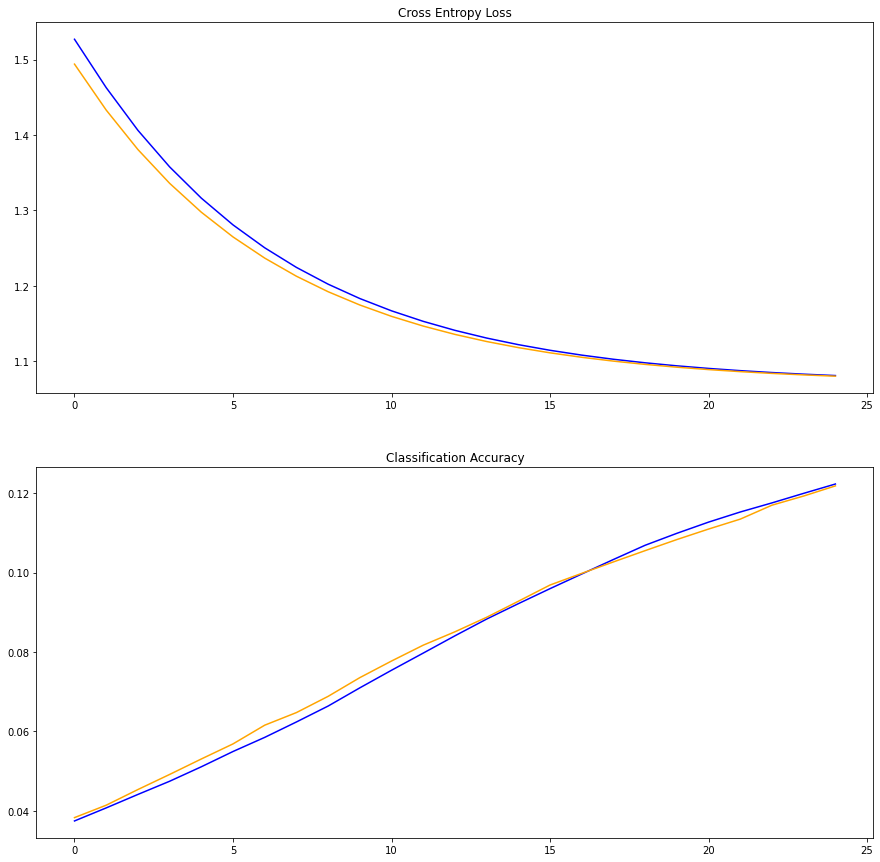

In [ ]:
show_learning_graphs(history)

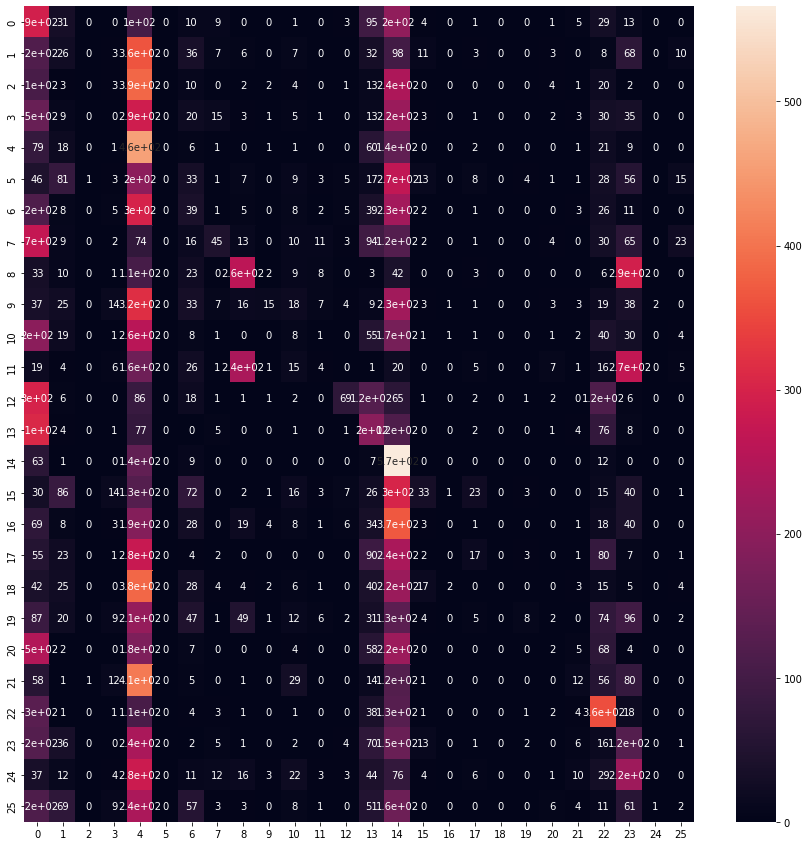

In [ ]:
# Confusion Matrix
import numpy as np
from tensorflow.keras.utils import to_categorical

predicted_classes = to_categorical(np.argmax(svm_model.predict(X_test),axis=1))
confusion_matrix(y_test,predicted_classes)

In [ ]:
classification_report(y_test,predicted_classes)

              precision    recall  f1-score   support

    Class FI       0.00      0.00      0.00         0
     Class A       0.09      0.36      0.15       800
     Class B       0.05      0.03      0.04       800
     Class C       0.00      0.00      0.00       800
     Class D       0.00      0.00      0.00       800
     Class E       0.08      0.57      0.14       800
     Class F       0.00      0.00      0.00       800
     Class G       0.07      0.05      0.06       800
     Class H       0.36      0.06      0.10       800
     Class I       0.40      0.33      0.36       800
     Class J       0.44      0.02      0.04       800
     Class K       0.04      0.01      0.02       800
     Class L       0.08      0.01      0.01       800
     Class M       0.61      0.09      0.15       800
     Class N       0.16      0.24      0.19       800
     Class O       0.12      0.71      0.20       800
     Class P       0.28      0.04      0.07       800
     Class Q       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
